In [1]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset.
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Exploratory Data Analysis

In [4]:
# Checking the dimensions of the dataset.
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep='last', inplace=True)

In [10]:
df.shape

(32536, 15)

<Axes: >

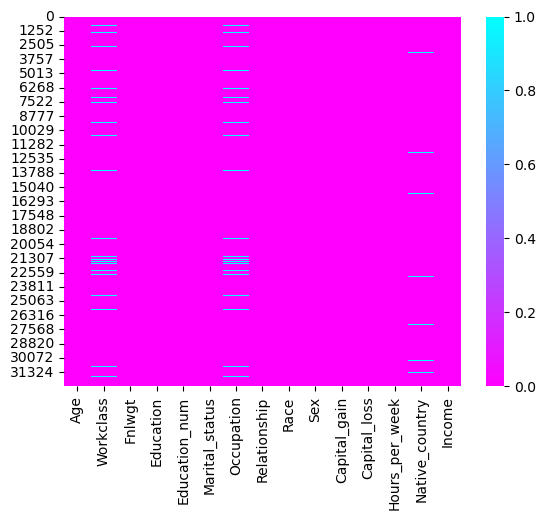

In [16]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

In [12]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
123011    13
203488    13
121124    12
113364    12
          ..
140176     1
318264     1
329205     1
171373     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool       

In [14]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [15]:
df=df.replace(' ?',np.NaN)

In [17]:
# Separating numerical and categorical variable
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Categorical=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [18]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [19]:
df.isnull().sum().sort_values(ascending = False)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

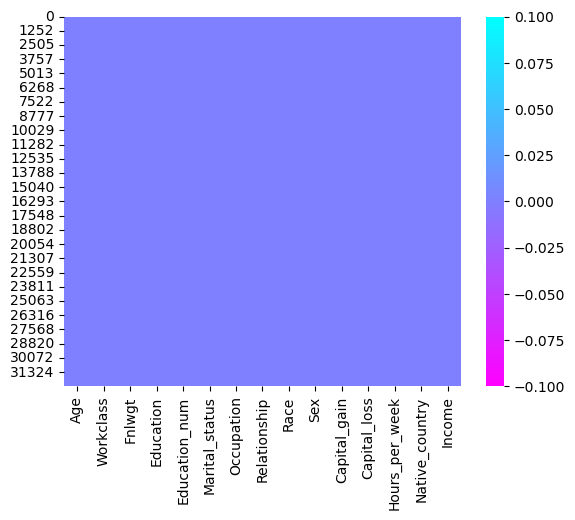

In [20]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

# Description of Dataset

In [21]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The minimum and maximum age of people in the dataset is 17 and 90 years respectively.Maximum years spent on Education is 16 years and minimum is 1 year. Maximum Capital gain is 99999 while maximum capital loss is 4356. Maximum hours spent per week is 99 and average hour spent is 40 hours.

# Data Visualization

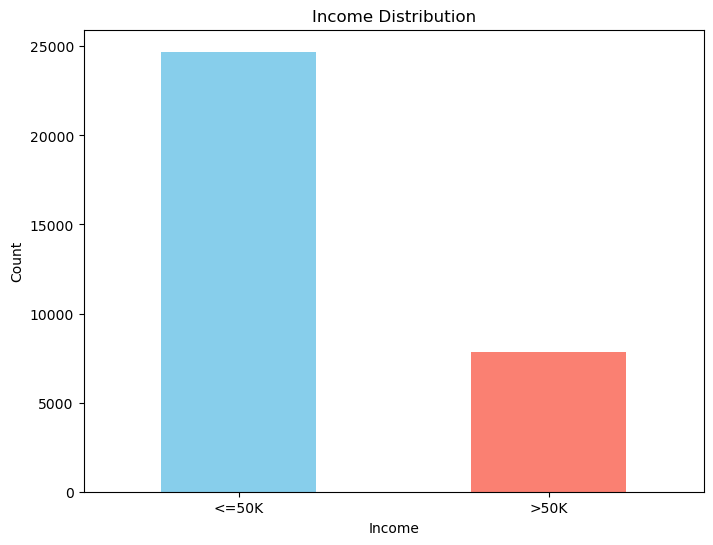

In [24]:
# Plot income distribution
plt.figure(figsize=(8, 6))
df['Income'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'], rotation=0)
plt.show()

We can see that our target is imbalanced, so we will balance it later using SMOTE. Lets move forward for now.

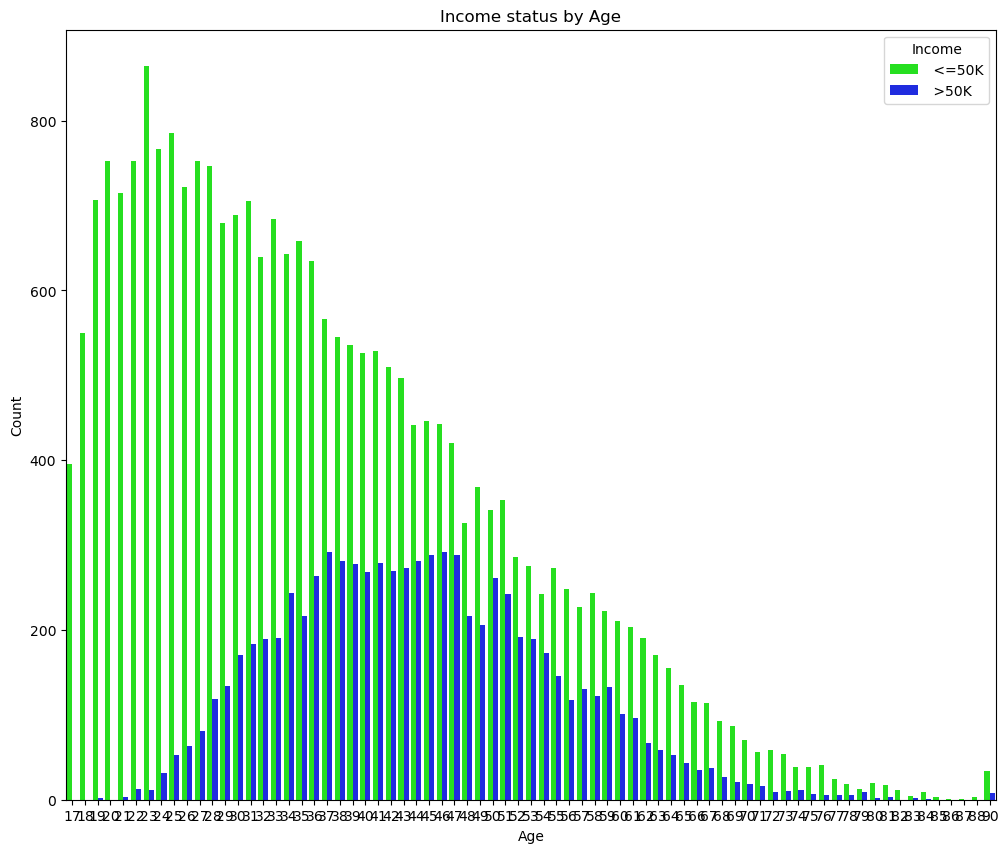

In [31]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Age', hue='Income', data=df, palette='hsv')
plt.title('Income status by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

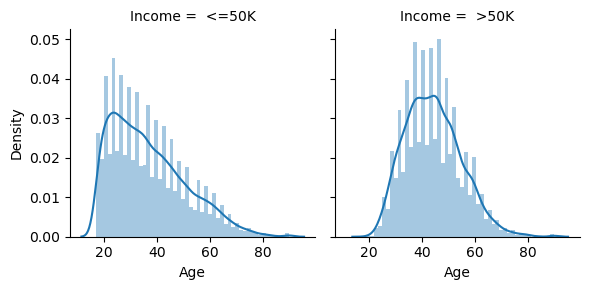

In [27]:
# Distribution of age with income categories
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

Nearly people of age 17-30 years are earning and the count drops with increasing age.We can see people earning more than 50K dollars are in age range of 35-50 and 51-60 years.

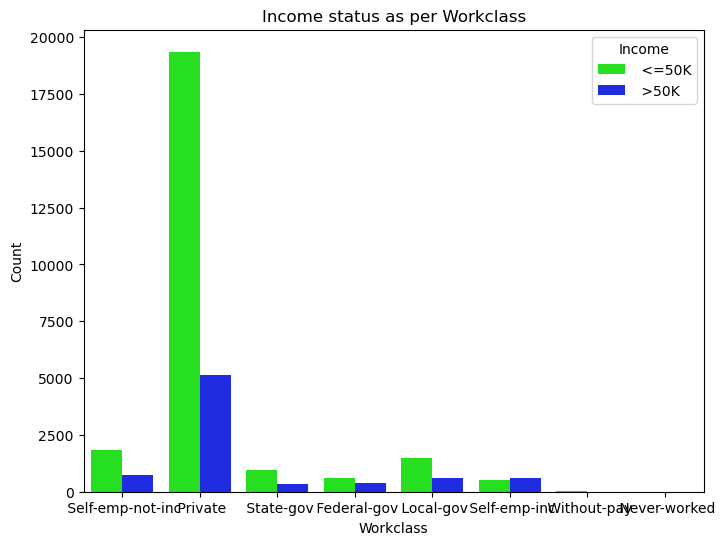

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Workclass', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [29]:
pd.crosstab(df['Income'],df["Workclass"], margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


Private workclass earning more than 50K dollars are more as compared to other workclasses. In case of Federal-gov the difference is very less as compared to others.

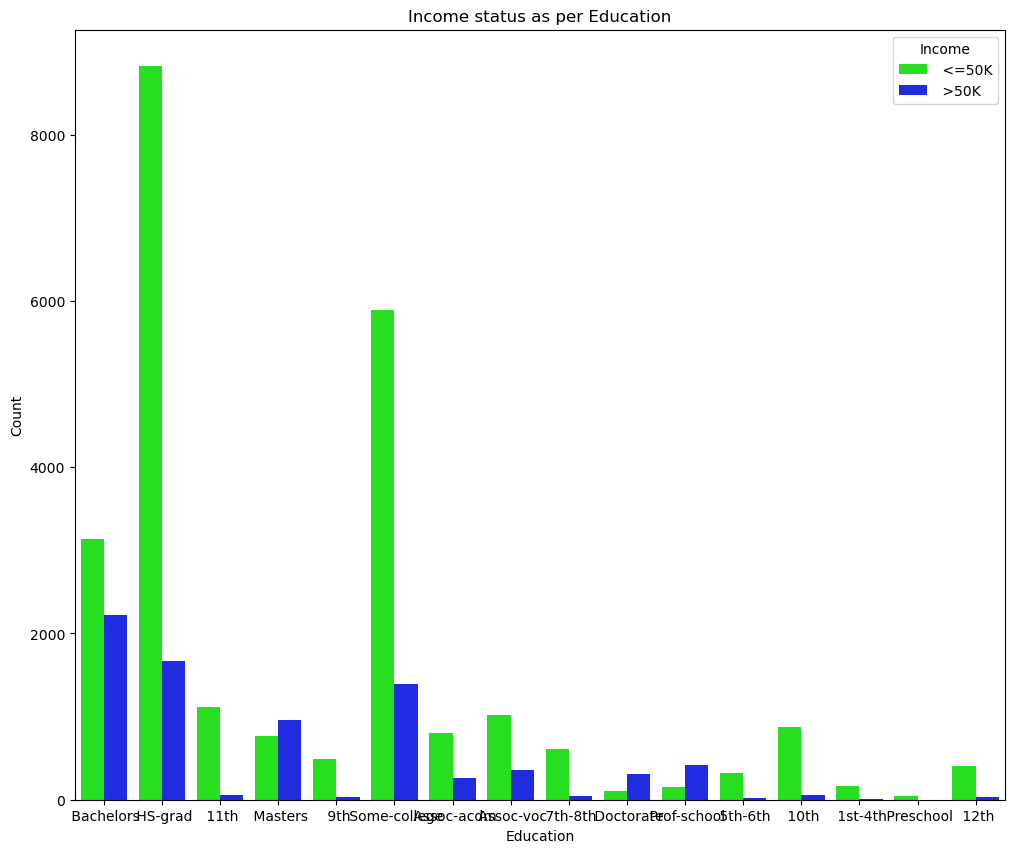

In [33]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Education', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

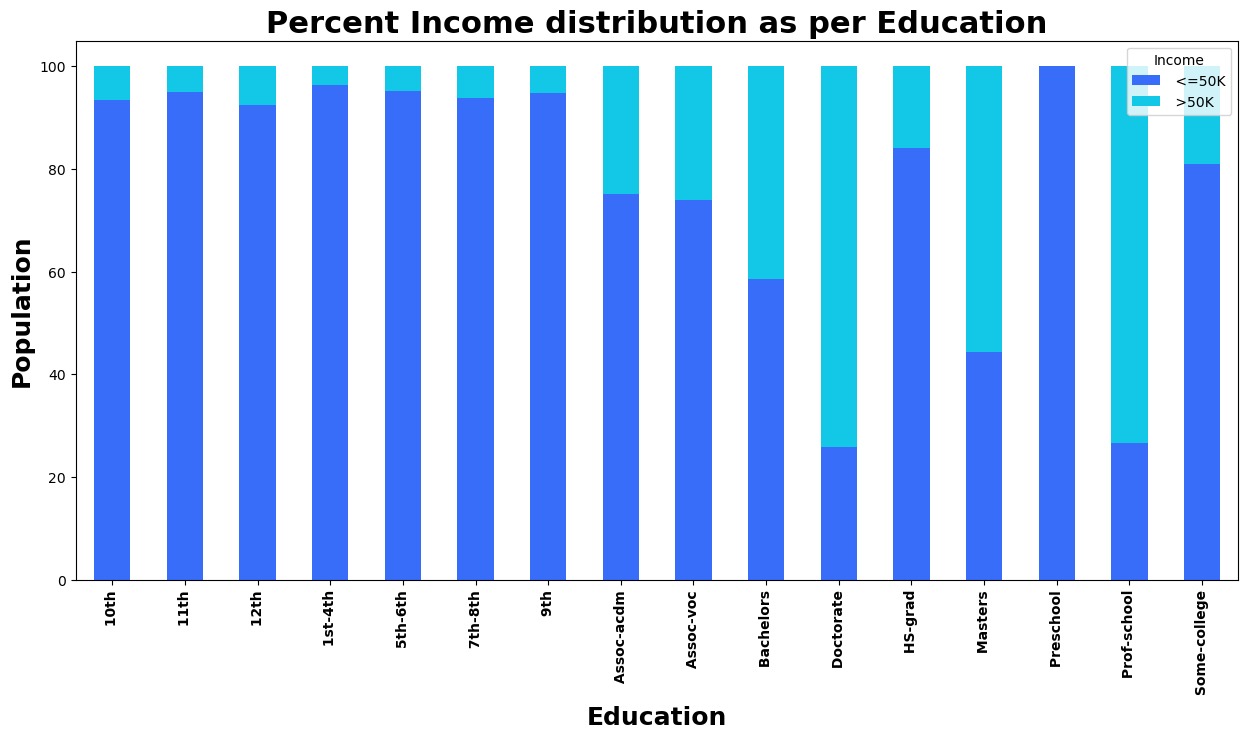

In [34]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Doctorate earning more than 50K are more followed by Prof-schoolers. Later it is followed by people who did masters. Also none of the preschoolers are getting more than 50K dollars.

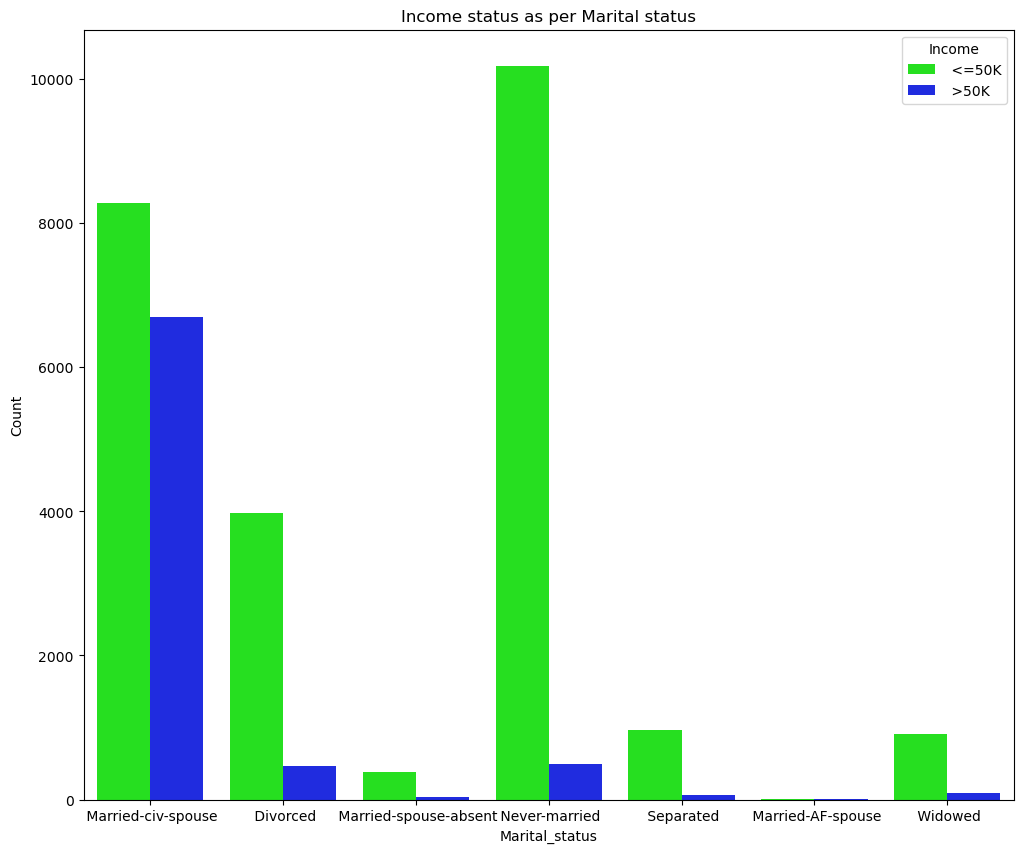

In [37]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Marital_status', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Marital status')
plt.xlabel('Marital_status')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [38]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


In case of Married-civ-spouse the count is nearly same. Also the ones who Never-married	are earning less than 50K.

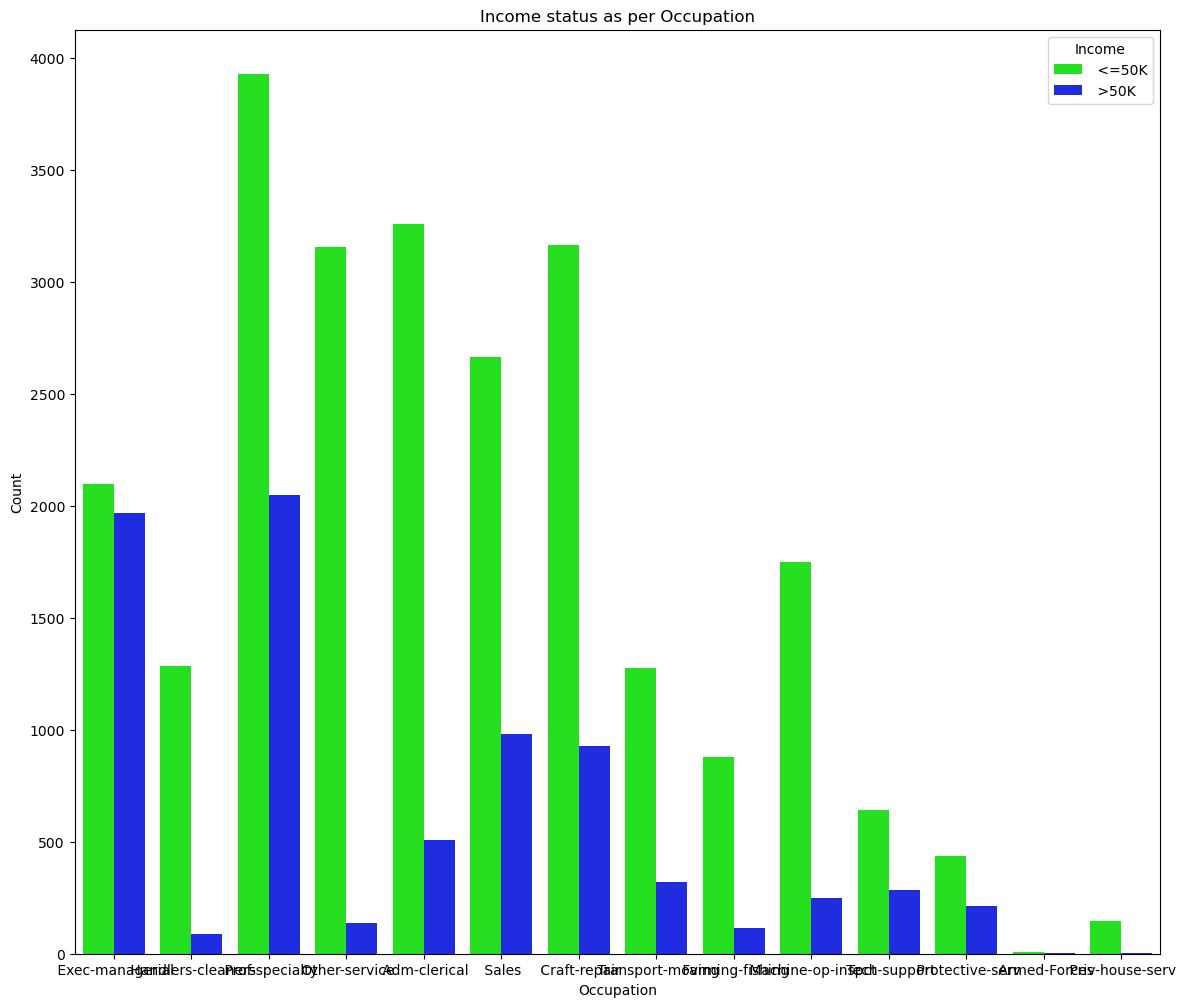

In [40]:
plt.figure(figsize=(14, 12))
sns.countplot(x='Occupation', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

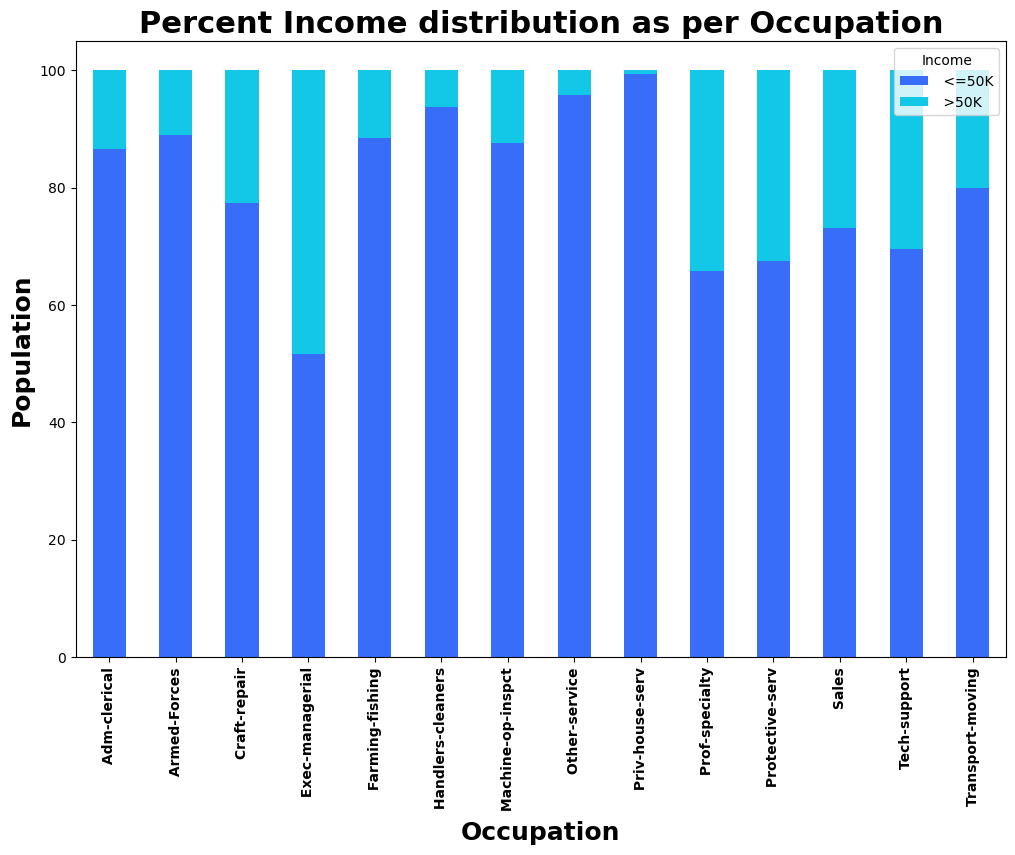

In [41]:
# Percentage Income distribution in terms of Education
sns.set_palette('rainbow')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

Exec-managerial are the ones earning more than 50 K in large number as compared to others followed by Prof-speciality. Very few Handlers-cleaners are earning more than 50K dollars.

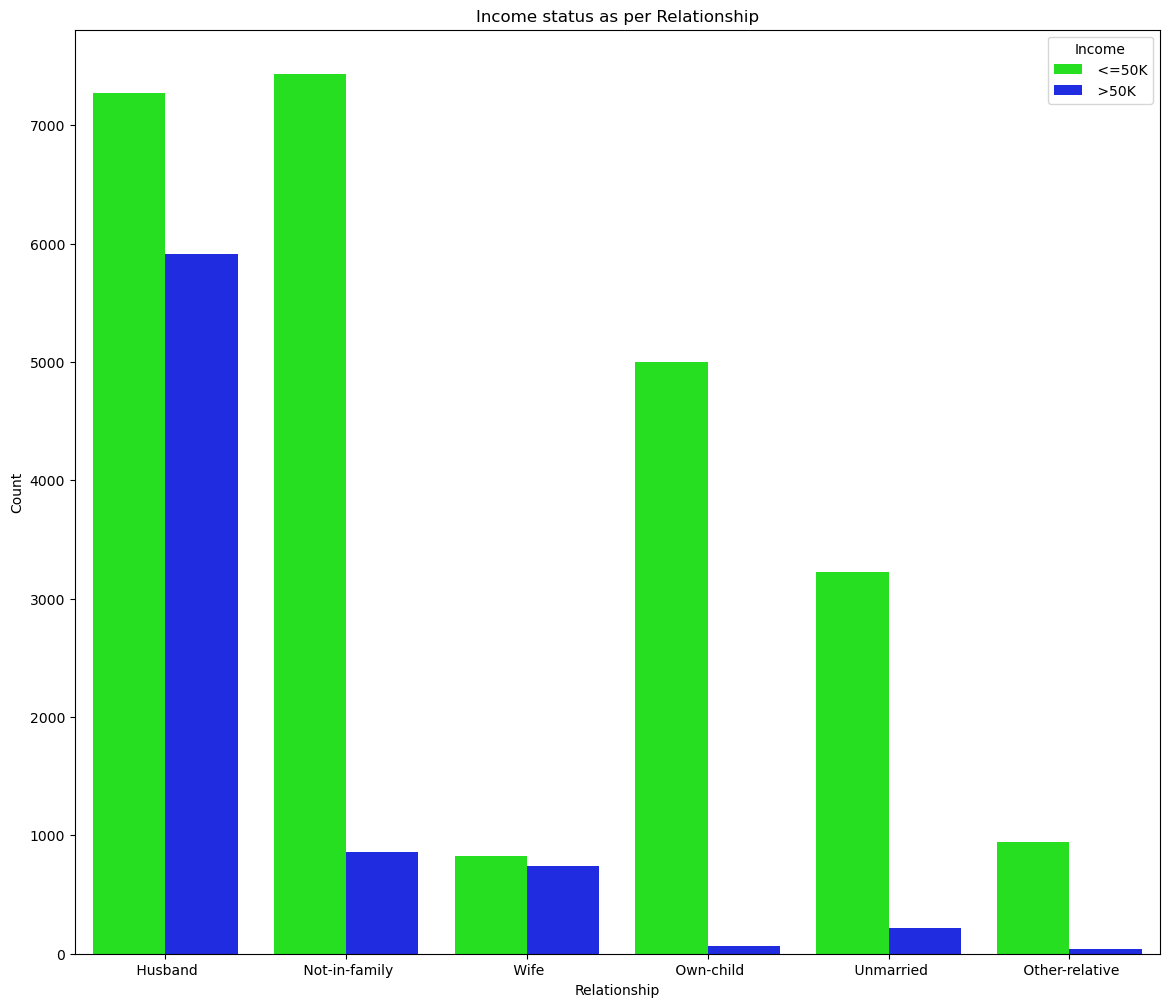

In [42]:
plt.figure(figsize=(14, 12))
sns.countplot(x='Relationship', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

Husbands are earning morethan 50K are more than the others. Also wives earning more than 50K are nearly equal to those earning less than 50K dollars. Here we see that unmarried people earning more than 50K are very less. So we can say that married couples are earning more.

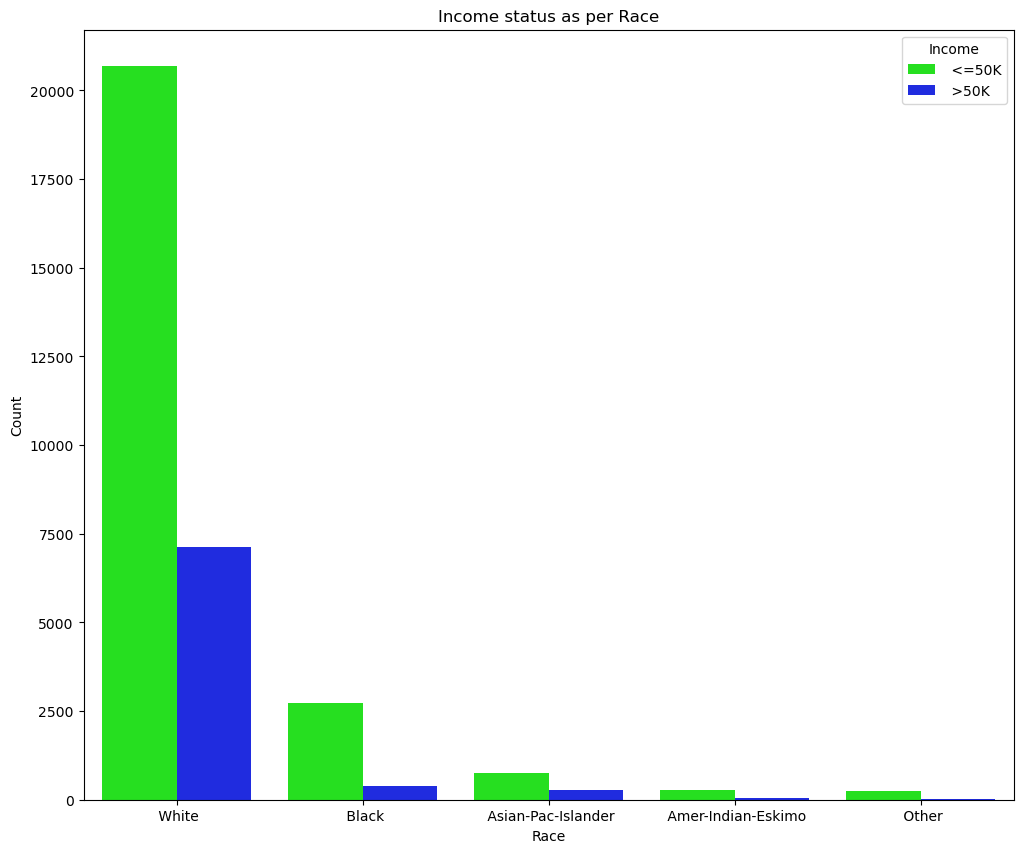

In [45]:
plt.figure(figsize=(12, 10))
sns.countplot(x='Race', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

Whites are earning more than 50K dollars as compared to other races. Very few blacks and Asian-Pac-Islanders are earning more than 50K dollars.

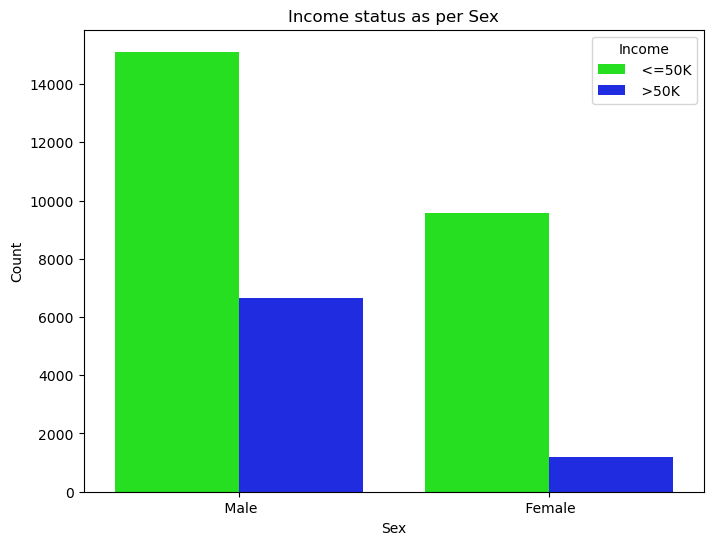

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Income', data=df, palette='hsv')
plt.title('Income status as per Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

Male earning more than 50k income are more as compared to those earning less than 50K income . Also they are more than the females earning 50k dollars.

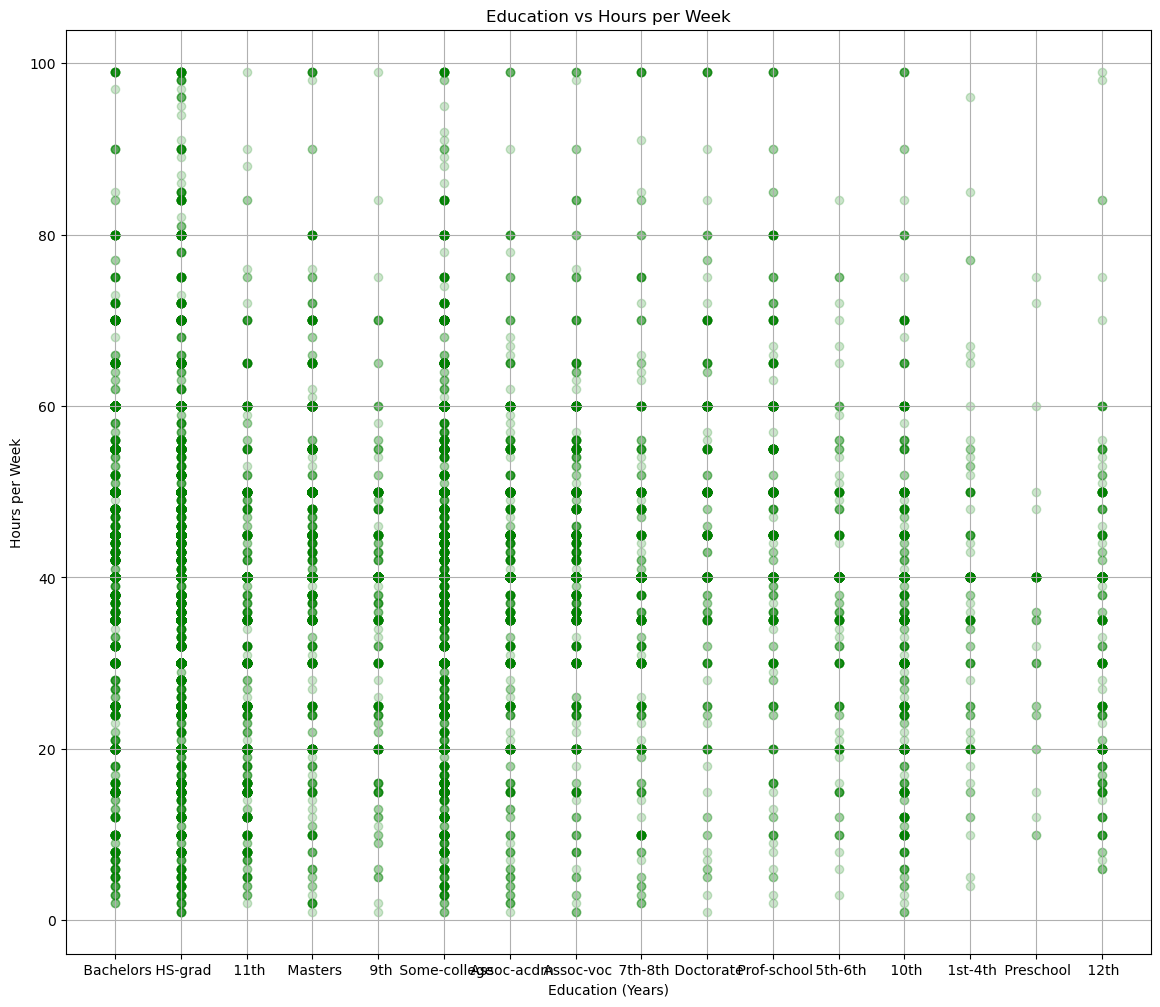

In [50]:
# Plot education vs hours per week
plt.figure(figsize=(14, 12))
plt.scatter(df['Education'], df['Hours_per_week'], alpha=0.2, color='green')
plt.title('Education vs Hours per Week')
plt.xlabel('Education (Years)')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

## Encoding Categorical Data

In [51]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


# Feature Selection and Engineering

## Outlier Detection and Removal

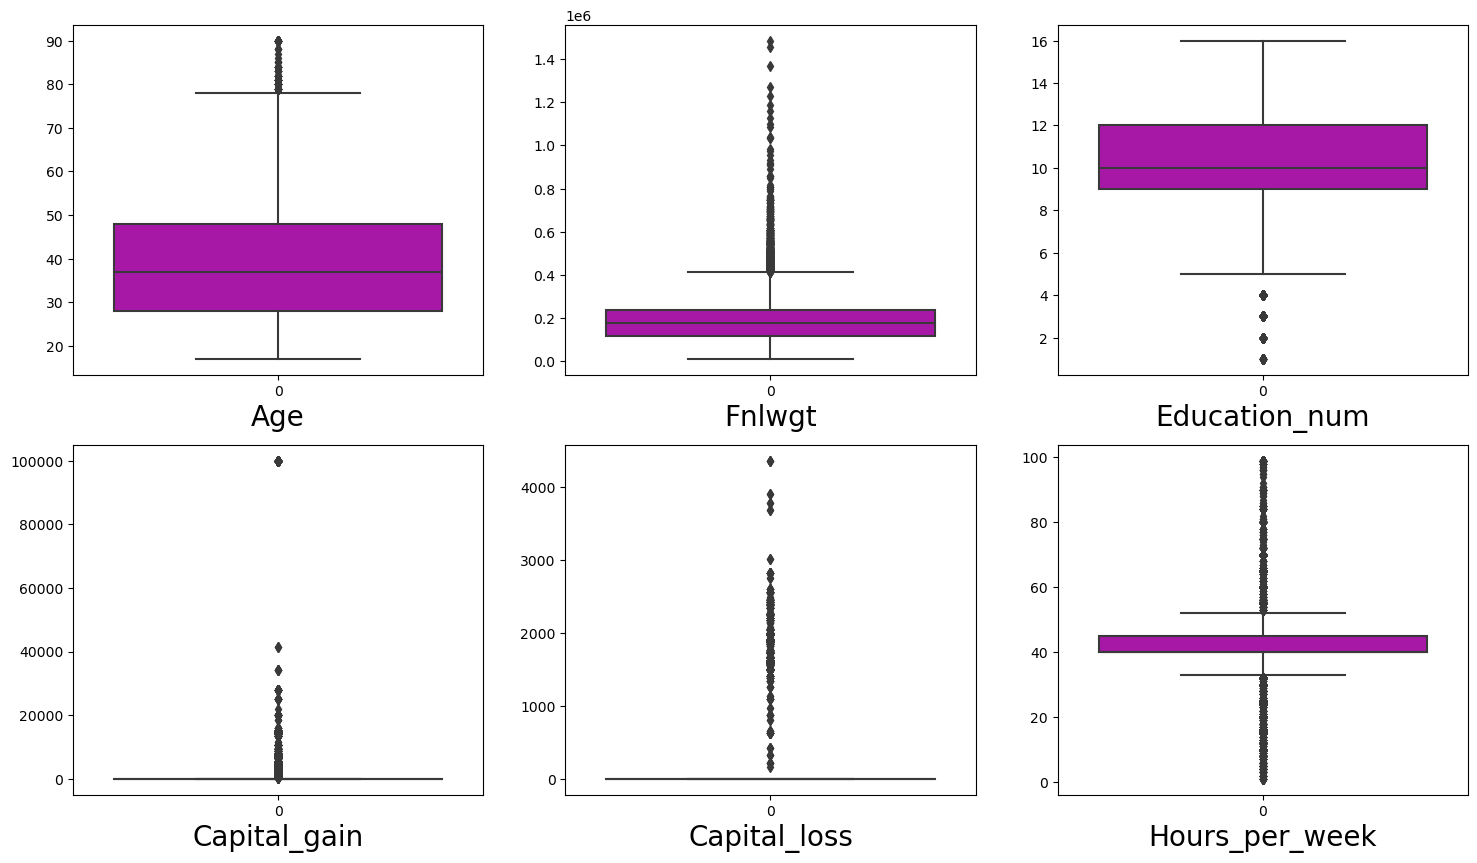

In [52]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='m')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


Here, outliers are clearly visible so we will resolve this issue and drop unnecessary columns.

In [53]:
# Droping unnecessary columns
df.drop(["Fnlwgt", "Education"], axis=1, inplace=True)

In [54]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3

In [55]:
df=df[(z<3).all(axis = 1)]
df.shape

(28061, 13)

In [56]:
# Lets calculate percentage data loss.
((32536-28061)/32536)*100

13.753995574133269

Here we are suffering a loss of nearly 13% of the data. But our dataset is very large and also there are still amny rows and columns left so we can still proceed.

## Checking Skewness

In [57]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

 Relationship, Sex, Native country and Income are highly skewed, but since they are categorical concept related to skewness so they dont affect much.Also, Capital_gain and Capital_loss have varied numbers from zero to other numbers so even on transforming they will show skewness, our data will be skewed even at end .

## Correlation between Independent variable and Target variable

In [58]:
cor=df.corr()

<Axes: >

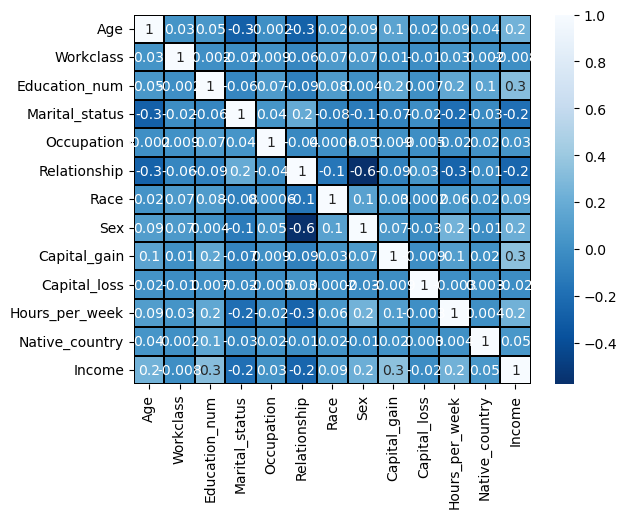

In [59]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

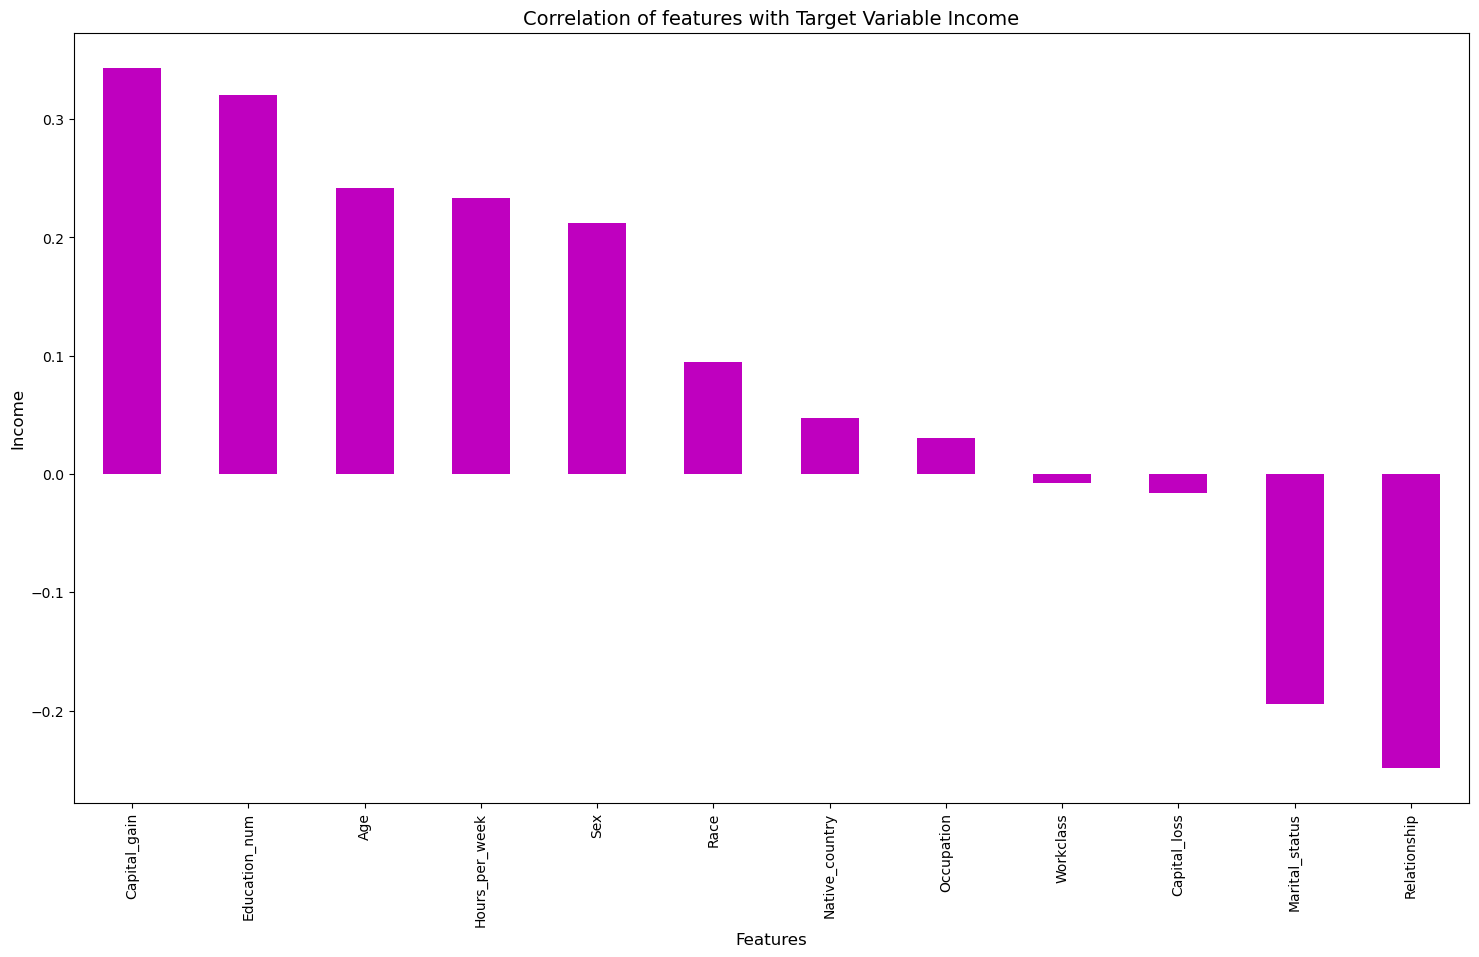

In [60]:
plt.figure(figsize = (18,10))
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Correlation of features with Target Variable Income',fontsize = 14)
plt.show()

We can see that Capital_gain is highly correlated to our target feature .Also some categorical features like Race, Sex, Workclass,Occupation and Native_country are not that much related we will see about them later. Also. capital_loss is poorly correlated with our target feature.

### Variance Inflation Factor

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


We can see that some of our features are highly multicollinear and if we try to remove them, it mifght cause problems as they themselves are correlated moderately or poorly. Lets scale our data and go for PCA.

# Balancing Target Feature

## Using SMOTE

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

In [64]:
# Oversampleing using SMOTE Technique.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [65]:
Y.value_counts()

Income
0    21767
1    21767
Name: count, dtype: int64

We have now balanced our target, now we will proceed further so as to make sure that our data is not biased.

## Using Standard Scalarization

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

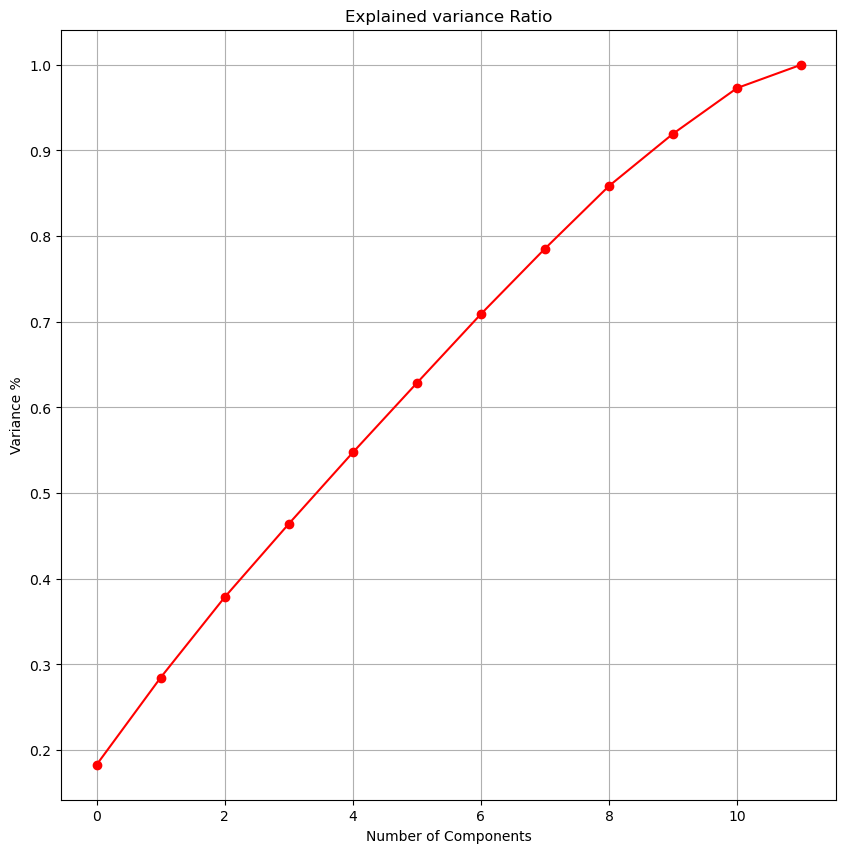

In [67]:
from sklearn.decomposition import PCA
pca = PCA()

#Plotting the graph to find the principal components

x_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to our graph, we can see that 9 principal components contribute  for 90% of variation in our data. We will thus  pick the first 9 components for our analysis.

In [68]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scaled)

In [69]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (32650, 9)
Training target size: (32650,)
Test feature size: (10884, 9)
Test target size: (10884,)


## Finding Best Random State

In [72]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(Principle_x,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7794009555310547 on Random_state 28


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=28, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy: 0.7794009555310547
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      5466
           1       0.77      0.79      0.78      5418

    accuracy                           0.78     10884
   macro avg       0.78      0.78      0.78     10884
weighted avg       0.78      0.78      0.78     10884



In [74]:
model=[ 
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy:', accuracy)

    print('Classification Report:')
    print(classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy: 0.8234105108416023
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      5466
           1       0.78      0.91      0.84      5418

    accuracy                           0.82     10884
   macro avg       0.83      0.82      0.82     10884
weighted avg       0.83      0.82      0.82     10884

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy: 0.818632855567806
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      5466
           1       0.80      0.84      0.82      5418

    accuracy                           0.82     10884
   macro avg       0.82      0.82      0.82     10884
weighted avg       0.82      0.82      0.82     10884

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy: 0.8623667769202499
Class

## Cross Validation Score

In [75]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, Principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print('\n')
    print('============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.7603078  0.76949581 0.76524635 0.77845412 0.7705031 ]
Mean Score : 0.7688014356977446




Cross Validation Score SVC() :

Score : [0.8139428  0.82209716 0.81865166 0.82703572 0.83184011]
Mean Score : 0.8227134912164986




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79189158 0.81543586 0.83346733 0.84322959 0.83379279]
Mean Score : 0.8235634269619061




Cross Validation Score RandomForestClassifier() :

Score : [0.83197427 0.85368095 0.86849661 0.87492822 0.87146795]
Mean Score : 0.8601096007339641




Cross Validation Score ExtraTreesClassifier() :

Score : [0.82829907 0.85126909 0.87021936 0.87642127 0.87043418]
Mean Score : 0.8593285961682169




From above two situations it is clearly seen that Random forest classifier and Extra tree classifier both are good models. But the Mean score and Accuracy of Random forest classifier is much better than that of extra tree classifier so we will proceed with Random Forest Classifier as our model. 

# Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter = { 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [78]:
GSCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]})

In [79]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Model

In [80]:
Final_model = RandomForestClassifier(criterion='entropy',n_estimators= 70, max_depth=20 ,max_features='log2')
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.861539875045939


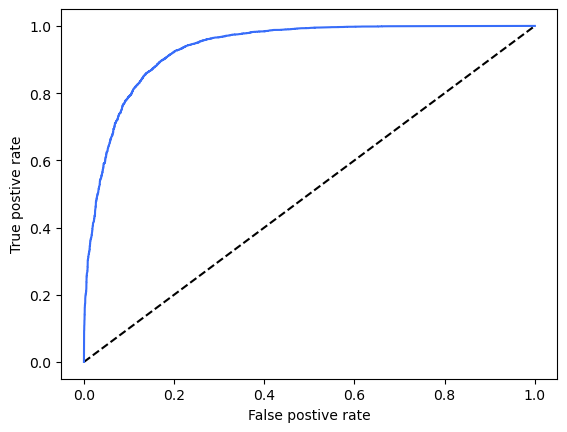

Auc Score :
 0.8617134453233296


In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_model.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [83]:
# Saving Model
import joblib
joblib.dump(Final_model,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']